# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, matthews_corrcoef, roc_auc_score, fbeta_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN

np.random.seed(42)

## Dataset

In [2]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

I usually start by taking a look at the data. Gives me a good idea for the number of examples we have and the dimensions of X and Y. Here we see we have 500 examples and X has 2 dimensions.

In [3]:
X.shape, Y.shape

((500, 2), (500,))

Getting a grasp on how the data looks. This is a relatively easier example, so we can plot 2D and encode Y to colors since it's a binary categorial variable.

We can also see that we don't have any linear separation and that this is pretty jumbled up. In terms of complexity, probably an ensembling tree or SVM would probably be best for this. 

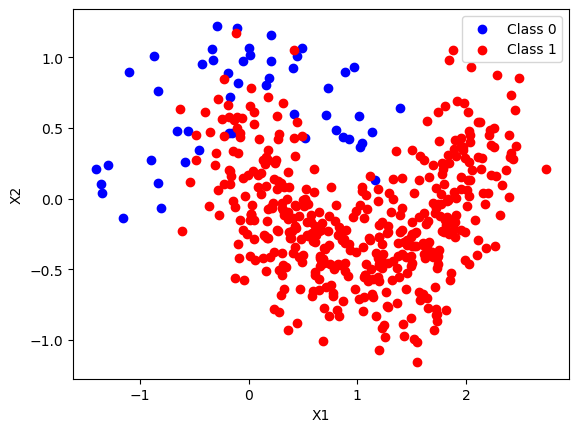

In [4]:
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color='blue', label="Class 0")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color='red', label="Class 1")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc="best")
plt.show()

We also see we have pretty imbalance data where 90% of our data is comprises of 1's. For ensembling and SVMs, I don't think this will be a big issue. But for simpler models like Logistic Regression, sampling techniques like SMOTE (or variations) and oversampling the minority class would be useful.

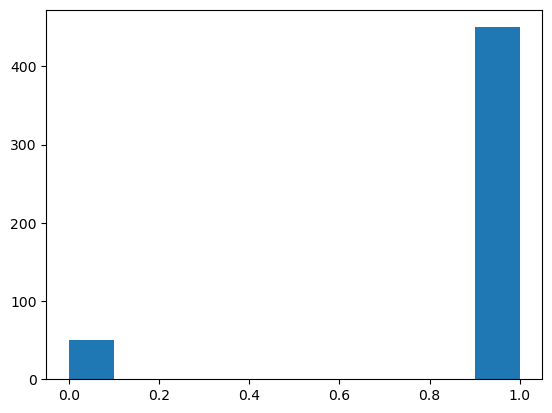

In [5]:
plt.hist(Y);

## Training

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

In [7]:
np.mean(Y == 1)

0.9

In [8]:
np.mean(Y_test == 1)

0.896

In [34]:
# model = LogisticRegression()
model = SVC()
# model = RandomForestClassifier(n_estimators=100)

In [35]:
model.fit(X_train, Y_train);

In [36]:
# model.coef_

In [37]:
Y_pred = model.predict(X_test)

In [59]:
oversample = SMOTE() # this was messing something up, separability?
# oversample = ADASYN()
# oversample = SMOTEENN()

In [60]:
X_train_try, Y_train_try = oversample.fit_resample(X_train, Y_train)

In [61]:
X_train_try.shape, Y_train_try.shape

((676, 2), (676,))

In [62]:
np.mean(Y_train_try == 0), len(Y_train_try[Y_train_try == 0])

(0.5, 338)

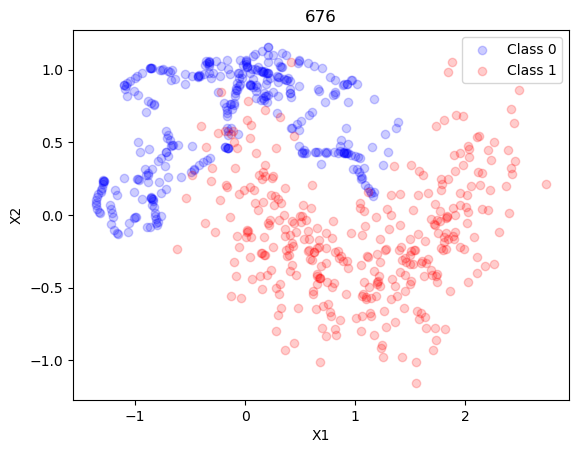

In [63]:
plt.scatter(X_train_try[Y_train_try == 0, 0], X_train_try[Y_train_try == 0, 1], color='blue', label="Class 0", alpha=0.2)
plt.scatter(X_train_try[Y_train_try == 1, 0], X_train_try[Y_train_try == 1, 1], color='red', label="Class 1", alpha=0.2)
plt.title(f"{len(X_train_try)}")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc="best")
plt.show()

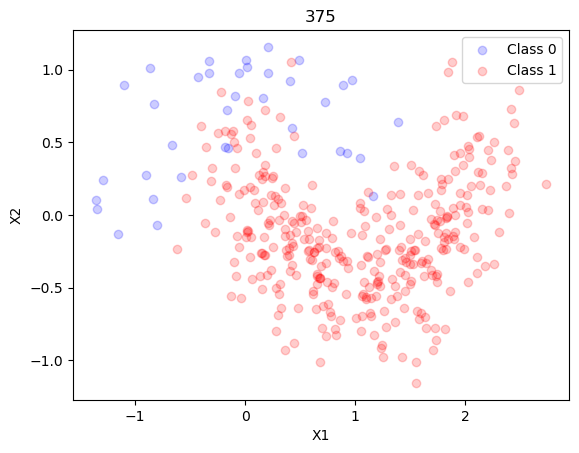

In [64]:
plt.scatter(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], color='blue', label="Class 0", alpha=0.2)
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], color='red', label="Class 1", alpha=0.2)
plt.title(f"{len(X_train)}")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc="best")
plt.show()

In [72]:
# model2 = LogisticRegression()
model2 = SVC()
# model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train_try, Y_train_try)
Y_pred2 = model2.predict(X_test)

F1 Score: 0.9532710280373832 
Accuracy: 0.92
F2: 0.9272727272727272
MCC: 0.7174618824683519 
AUC: 0.9553571428571428


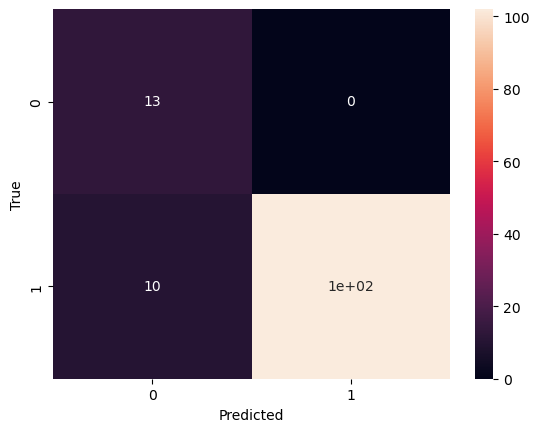

In [73]:
f1 = f1_score(Y_test, Y_pred2)
fb = fbeta_score(Y_test, Y_pred2, beta=2)
acc = accuracy_score(Y_test, Y_pred2)
roc_auc = roc_auc_score(Y_test, Y_pred2)
mcc = matthews_corrcoef(Y_test, Y_pred2)
print(f"F1 Score: {f1} \nAccuracy: {acc}\nF2: {fb}")
print(f"MCC: {mcc} \nAUC: {roc_auc}")
cf_matrix = confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cf_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True");

## Performance Analysis

In [74]:
f1 = f1_score(Y_test, Y_pred)
fb = fbeta_score(Y_test, Y_pred, beta=2)
acc = accuracy_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)
mcc = matthews_corrcoef(Y_test, Y_pred)
print(f"F1 Score: {f1} \nAccuracy: {acc}\nF2: {fb}")
print(f"MCC: {mcc} \nAUC: {roc_auc}")

F1 Score: 0.9557522123893806 
Accuracy: 0.92
F2: 0.9608540925266904
MCC: 0.5417284266184768 
AUC: 0.7513736263736264


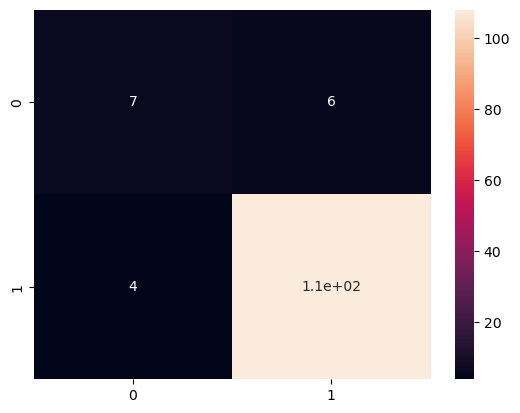

In [75]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True);

In [58]:
def flow(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    f1 = f1_score(Y_test, Y_pred)
    acc = accuracy_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_pred)
    mcc = matthews_corrcoef(Y_test, Y_pred)
    
    print(f"F1 Score: {f1} \nAccuracy: {acc}")
    print(f"MCC: {mcc} \nAUC: {roc_auc}")
    
    cf_matrix = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cf_matrix, annot=True)
    
    return model